#  Capstone Project 2: Stock price forecasting
# Section 3: Exploratory Data Analysis

This notebook is dedicated to the Exploratory Data Analysis (EDA) step of our project. Since we are dealing with stock price time series, the EDA should investigate trends and underlying patterns in our datasets, as well as the volatility of the stocks we are studying and correlations between the different features. Here we outline the aspects that we will be studying in this section for both the KO and TSLA stocks. These companies represent large players in their respective industries and analyzing their stock price behavior will provide us with insightful knowledge into these differing markets.

Firstly, we will commence by visually inspecting the stock price data, aiming to identify discernible trends, patterns, and potential outliers. The plots of stock prices over time for both KO and TSLA will be critical to initially assess the overall movement and volatility of the stock prices.

Following this, we will perform a time series decomposition to separate the underlying trend, seasonality, and noise components. This decomposition is crucial in helping us discern the inherent characteristics of the time series and make informed decisions when modeling.

Next, we will undertake volatility analysis. In financial markets, volatility is a vital measure of the price variations. Understanding volatility patterns can help in the decision-making process by providing a measure of risk associated with the stocks.

Subsequently, we will conduct a correlation analysis to uncover potential relationships between our features, namely stock prices and earnigns per share. Discovering such relationships can aid in predicting price movements and creating a more robust forecasting model.

Lastly, we will perform a lag analysis, which will help us in identifying the temporal structure and dependencies in the data. This analysis could further reveal any autocorrelation in the series.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Coca-Cola stock

We start by importing the data we stored in a csv file:

In [2]:
# Read the csv file containing the data for the KO stock.
# index_col=0 tells pandas to use the first column as the index. 
# parse_dates=True tells pandas to interpret the index as a DateTimeIndex.
df_KO = pd.read_csv('KO.csv', parse_dates=True, index_col=0)

Let us recall what columns this dataframe has:

In [3]:
df_KO.head()

,Open,High,Low,Close,Adj Close,Volume,Reported EPS
Date,,,,,,,
1996-04-17,20.28125,20.28125,19.84375,20.03125,10.141947,8906000,0.14
1996-04-18,20.03125,20.15625,19.84375,19.87500,10.062837,9608000,0.14
1996-04-19,19.87500,20.06250,19.56250,19.68750,9.967900,13010400,0.14
1996-04-22,19.87500,20.18750,19.87500,20.15625,10.205229,7160800,0.14
1996-04-23,20.15625,20.28125,20.06250,20.25000,10.252701,6218800,0.14


The `Open` and `Close` columns display the stock prices at opening and closing time of stock market on a given date, respectively. The columns `High` and `Low` contain the highest and lowest prices of the stock on a given date. 

The `Adj Close` refers to the "Adjusted Closing Price." This is a stock's closing price on any given day of trading that has been amended to include any corporate actions that occurred at any time before the next day's open. For instance, dividends and stock splits can affect the stock price.

`Volume` refers to the number of shares traded on a given day. This is a significant metric for traders because it provides an indication of the strength or intensity behind price movements. High volume levels often signify a lot of trader interest or excitement about a stock, while low volume levels might indicate a lack of interest or awareness.

`Reported EPS` contains the last reported earnings per share (EPS). EPS is a financial metric representing the portion of a company's profit allocated to each share of a stock. It is an indicator of a company's profitability and is often considered to be one of the most important variables in determining a share’s price. 

Let's recheck that our dataframe has no null values:

In [4]:
df_KO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6724 entries, 1996-04-17 to 2022-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6724 non-null   float64
 1   High          6724 non-null   float64
 2   Low           6724 non-null   float64
 3   Close         6724 non-null   float64
 4   Adj Close     6724 non-null   float64
 5   Volume        6724 non-null   int64  
 6   Reported EPS  6724 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 420.2 KB


In the following we will choose the  `Close` column as our independent variable to model. 

### Data visualization

Let us begin by plotting the `Close` stock price over the period of time contained in our dataframe.

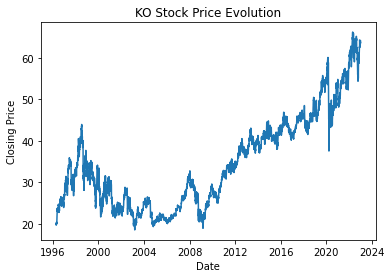

In [5]:
plt.plot(df_KO.index, df_KO['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('KO Stock Price Evolution')
plt.show()

We observe a phase of growth from 1996 to 1999 followed by a contracting trend that lasts until 2006. Then a short phase of exponential growth starts and is killed by the 2008 economic crisis, with a subsequent devaluation trend until 2009. From that point to the present, the stock has experienced a general trend of growth at different rates. affected y the COVID pandemic in 2020. 

The columns `Open`, `High` and `Low` exhibit a nearly identical distribution, which signals a very high correlation between the four columns.

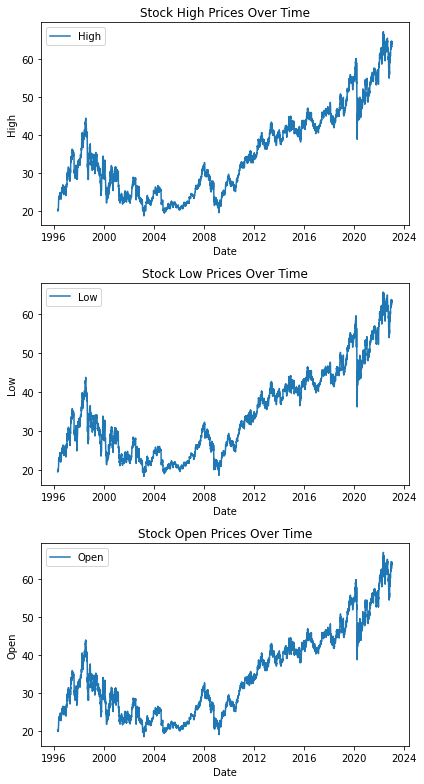

In [6]:
# Create a function to display the plots of 'Open', 'High', 'Low' and 'Close' prices.

def plot_stock_prices(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(6, 11))

    for ax, column in zip(axes, columns):
        ax.plot(df.index, df[column], label=column)
        ax.set_title('Stock ' + column + ' Prices Over Time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot the 'High', 'Low' and 'Open' columns
columns = ['High', 'Low', 'Open']
plot_stock_prices(df_KO, columns)

This is a general phenomenon for stock prices, which intuitively makes sense as they are all affected by the same overall market conditions, news, and sentiment surrounding the company and broader economic factors.

For the identification of trends, bullish and bearish signs, price reversals, liquidity, or interest level it is useful to plot the traded volume. For instance, volume can confirm the trend direction: in an uptrend, higher volume on up days and lower volume on down days confirms the trend, whereas the opposite would hold true in a downtrend. On the other hand, A sudden spike in volume can often signify a price reversal. And high trading volumes typically suggest higher liquidity, which means lower transaction costs and easier ability to buy or sell without affecting the price too much.

In our case, we obtain we following volume plot for KO stock;

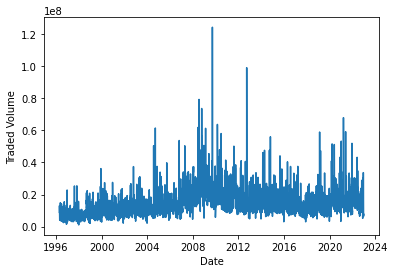

In [7]:
# Plot the 'Volume' feature over time
plt.plot(df_KO.index, df_KO['Volume'])
plt.xlabel('Date')
plt.ylabel('Traded Volume')
plt.show()

We can observe for instance that the highest spike in trading volume, which occured in 2009, signals the reversal of a bearish trend to a bullish phase. 

### Trend + seasonality + noise decomposition

A common step in the analysis of underlying patterns and behaviors of time series is the decomposition into trend, seasonality and noise. The trend component captures the underlying pattern of growth or decline in the time series data over a long period. The seasonal component captures patterns that repeat at regular intervals, such as daily, weekly, monthly, or quarterly, whereas the residual component captures the irregular fluctuations that cannot be attributed to the trend or seasonal components. 

In the case of stocks, one expects the seasonality component to be of low significance. While there might be some seasonality in stock prices due to factors like quarterly earnings reports or regular economic cycles, trends and irregular fluctuations (noise) are generally considerably more significant.

Let us perform the trend + seasonality + noise decomposition for the `Close` price of the KO stock. We use as a period the value `period=252`, namely the average number of yearly trading days in the US. Since we will be using this decomposition throught the notebook, we will define a function that accepts as input the dataframe and column where the decomposition is to be performed, with an adjustable period.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Define a function that accepts as input the dataframe 'df' and column 'column_name' and performs
# a decomposition of a time series into trend + seasonality + noise using an additive model

def decompose_timeseries(df, column_name, model='additive', period=1):
    '''
    Decompose a time series into its components.
    
    Parameters:
    df: DataFrame
    column_name: str, the name of the column containing the time series
    model: str, 'additive' or 'multiplicative', defines the type of seasonal component
    period: int, the period of the seasonality
    
    Returns:
    result: a naive decomposition of the input time series
    '''
    # Decompose the time series
    result = seasonal_decompose(df[column_name], model=model, period=period)

    # Plot the original time series, trend, seasonal component, and residuals 
    plt.figure(figsize=(12,8))

    # Original
    plt.subplot(411)
    plt.plot(df[column_name], label='Original')
    plt.legend(loc='upper left')

    # Trend
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')

    # Seasonality
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonality')
    plt.legend(loc='upper left')

    # Residuals
    plt.subplot(414)
    plt.plot(result.resid, label='Residuals')
    plt.legend(loc='upper left')

    plt.tight_layout()
    
    return result


Let's apply this function to our dataframe `df_KO` and column `Close` with period=252:

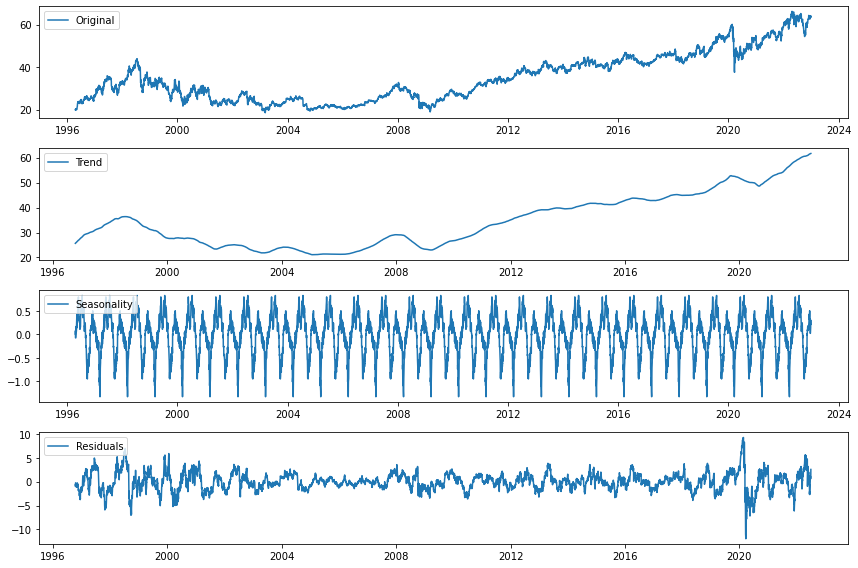

In [9]:
decompose_KO_Close = decompose_timeseries(df=df_KO, column_name='Close', period=252)

The plot of the trend confirms our previous insights: a bullish trend from 1996 to  1999 followed by a bearish phase until 2006, where an exponentail growth phase started and was frustrated by the 2008 banking crisis. A general trend of growth has been occuring since 2009. 
    
On the other hand, we observe that the seasonality component is not very significant in magnitude, as we expected (note that the order of magnitude of the seasonality component is around 1/100 of the stock price). We further observe that movements in stock prices related to the 2020 COVID pandemic and the 2022 Ukraine war are captured by the noise signal.

We can have a closer look at the seasonality component. Let us plot a single cycle.

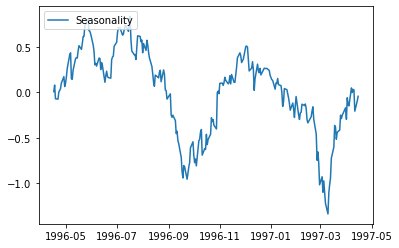

In [10]:
# Define the season length
season_length = 252

# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(decompose_KO_Close.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')


We find a seasonality component that has a wave-like pattern, with peaks around December and July and valleys around March and September. Understanding seasonality can be particularly useful in trading, however a complete seasonality analysis falls beyond the scope of this project. 

So far we have focused on the analysis of stock prices. Let us now turn to the reported earnings per share. The plot of the Reported EPS looks as follows:

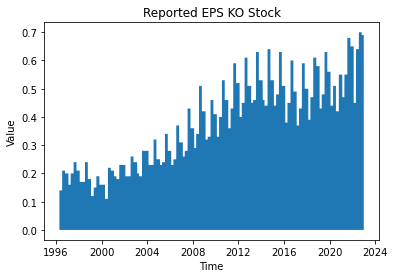

In [11]:
# Plot the 'Reported Earnings' data
plt.fill_between(df_KO.index, df_KO['Reported EPS'])
plt.title('Reported EPS KO Stock')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

We observe a general trend of growth over time with some modulation, as well as a marked seasonality signal. In order to gain a better understanding of the underlying patters, let us decompose into trend + seasonality + signal:

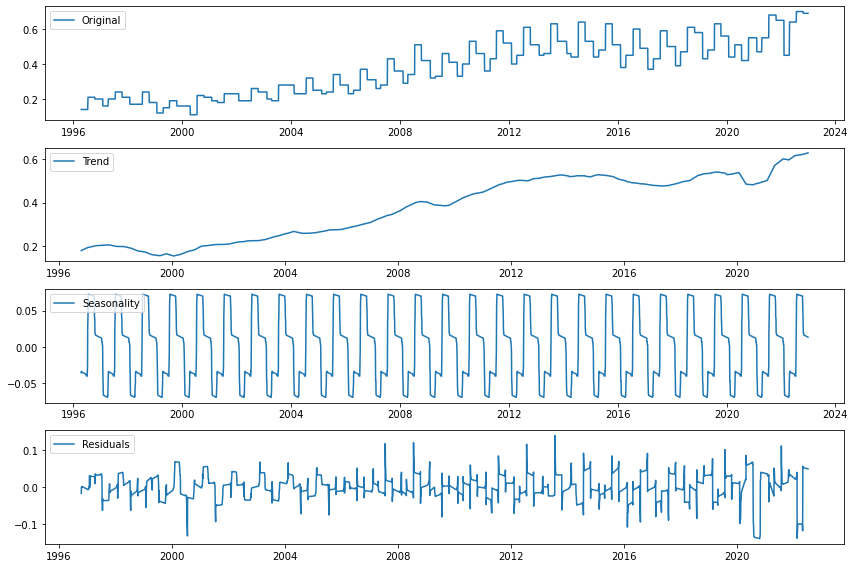

In [12]:
decompose_KO_EPS = decompose_timeseries(df=df_KO, column_name='Reported EPS', period=252)

The trend plot shows indeed overall growth with some intermediate phase of stagnation. The order of magnitude of the seasonality signal is now only 1/10 of the trend and thus has a significant impact, as hinted before. 

The seasonality component now has the following form:

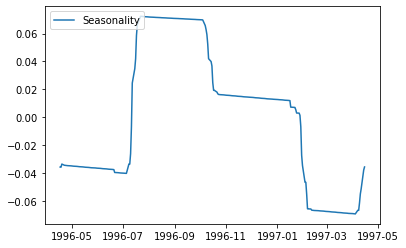

In [13]:
# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(decompose_KO_EPS.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')

It would be interesting to relate this shape to the sells of Coca-Cola products over the year. For instance, one would expect higher sells during the spring and summer, which should result in higher EPS in July. 

### Outliers

In order to check for outliers, it is useful to create a boxplot of closing prices by year:

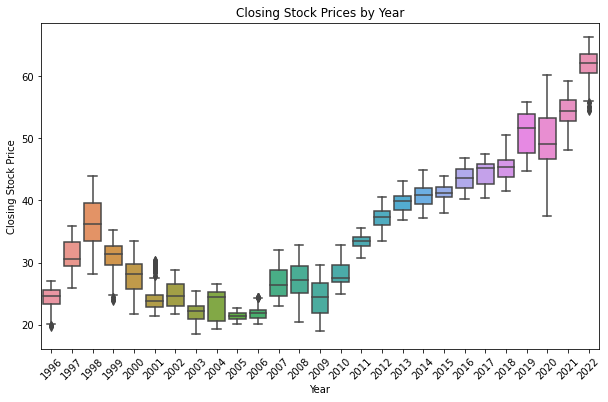

In [14]:
# Create a 'Year' column in the dataframe 'df_KO'
df_KO['Year'] = df_KO.index.year

# Create a boxplot of the closing prices by year
plt.figure(figsize=(10,6)) 
sns.boxplot(x='Year', y='Close', data=df_KO)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=45)
plt.show()

We see that only the years 1996, 1999, 2011, 2006 and 2022 have outliers. These do not deviate dramatically from the distribution, so we choose to keep them. 

### HIstogram and KDE estimation of probability density distribution

Let us now have a look at the histogram of the 'Close' price. Stock prices can be modeled as random variables, and so we can estimate a probability distribution for the histogram of stock prices at closing time. For this task we will use the Kernel Density Estimation (KDE) technique. KDE is a non-parametric method for estimating the probability density function of a given random variable, providing a way of smoothing data, and it is often used to identify the underlying distribution of the data or find the modes (peaks) in the data. It is independent of the choice of the number of bins. 

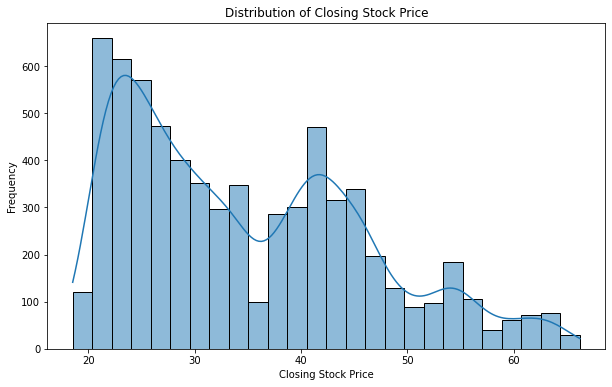

In [15]:
# Plot the histogram of the 'Close' stock price column. 
plt.figure(figsize=(10, 6))
sns.histplot(df_KO['Close'], kde=True) # 'kde=True' introduces the Kernel Density Estimation curve 
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

We know from the prices plot that most of the prices are comprised within the range between 20 and 30 dollars. This makes the KDE estimation curve skewed to the low end. We also observe four peaks around the closing stock prices of 23, 41, 55 and 62 dollars, which can be interpreted as the modes.

### Volatility

Volatility is a statistical measure of the degree of variation or dispersion in a series of data. In simple terms, it represents the amount of uncertainty or risk related to the size of changes in the values of a data series. In the context of financial markets, volatility is typically calculated as the standard deviation of logarithmic returns, often annualized for easier comparison across assets and markets (recall that the standard deviation measures how spread out the numbers in a data set are around the mean).

When computing the volatility of a stock price we first compute the logarithmic returns, as they are additive (as opposed to simple returns). Logarithmic returns are defined as the difference in the logarithm of two consecutive prices. Once these returns are calculated, the standard deviation of their distribution is computed. As mentioned earlier, this provides a measure of how much the price is expected to deviate from its average value on a day-to-day basis.



Let us first compute the log returns of the KO stock and visualize its distribution:

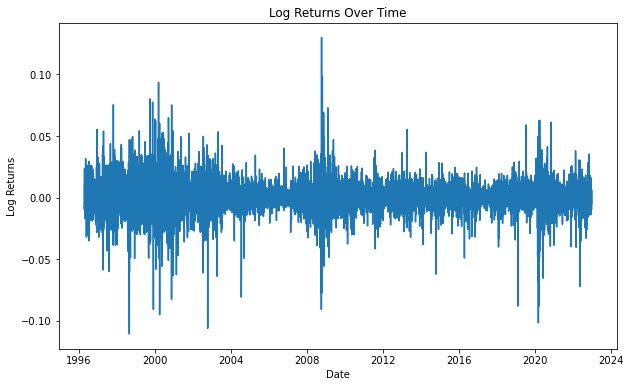

In [16]:
# Calculate log returns
df_KO['Log_Returns'] = np.log(df_KO['Close'] / df_KO['Close'].shift(1))

# Drop NA values
df_KO = df_KO.dropna()

# Plot log returns over time
plt.figure(figsize=(10, 6))
plt.plot(df_KO['Log_Returns'])
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()


We observe that this plot looks like withe noise. We can use the Augmented Dickey-Fuller test to check that indeed this distribution is stationary.

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_KO['Log_Returns'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -42.928660
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The null hypothesis of the ADF test is that the time series is non-stationary. So, when the p-value is less than the level of significance (0.05), we reject the null hypothesis and infer that the time series is stationary. The more negative the vaue of the ADF statistic, the more confident we are the data series behaves as stationary. More concretely:
     
1%: -3.431: If the test statistic is less than -3.431, then the null hypothesis can be rejected with a 99% level of confidence.

5%: -2.862: If the test statistic is less than -2.862, then the null hypothesis can be rejected with a 95% level of confidence. 

10%: -2.567: If the test statistic is less than -2.567, then the null hypothesis can be rejected with a 90% level of confidence. 

In our case, the ADF statistic value and p-value clearly indicate a stationary behavior.

We shall now compute the annualized volatility of the KO stock.

In [18]:
# Calculate the standard deviation of log returns (volatility)
volatility = df_KO['Log_Returns'].std()

# Calculate the annualized volatility
annualized_volatility = volatility * np.sqrt(252) * 100

print("Volatility: ", annualized_volatility)

Volatility:  22.309793118514104


Generally speaking, a stock with an annualized volatility above 30% might be considered highly volatile. A stock with annualized volatility below 20% might be considered of low volatility. In the case of the KO stock, we can say the volatility is rather on the low edge.

### Correlations

We turn to the investigation of the correlations between the different columns in our dataframe:

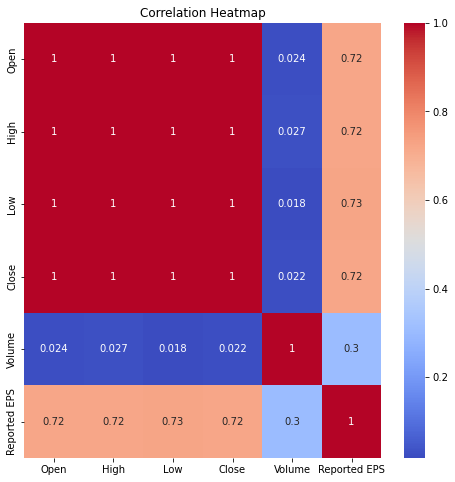

In [19]:
# Create a heatmap of the correlation between stock prices
corr = df_KO[['Open', 'High', 'Low', 'Close', 'Volume', 'Reported EPS']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The `Open`, `High`, `Low` and `Close` prices are highly correlated among themselves, as we expected from the similarity between their plots. 

Price and Volume (0.024): this very low correlation suggests that the daily fluctuations in Coca Cola's trading volume do not have a strong linear impact on the price of the stock on a day-to-day basis. Nevertheless, volume can play a role in price movements during punctual events such as earnings announcements, product launches, or other news events.

Price and Reported EPS (0.72): this is a significant positive correlation. The reason for this is that the EPS is a key indicator of a company's profitability, which is one of the primary drivers of stock price. It suggests that as Coca Cola's earnings grow, so does its stock price. Coca Cola is a mature, dividend-paying company and consistent earnings growth could be interpreted as a sign of stability and predictability, which could increase investor confidence and drive up the stock price.

Volume and Reported EPS (0.3): a positive but relatively weaker correlation between trading volume and reported EPS may suggest that trading activity increases slightly when earnings are announced. This could be due to a variety of reasons: investors reacting to the news, increased interest from traders looking to profit from the increased volatility, etc. The correlation is relatively weak, so it is likely that other factors also have a significant impact on trading volume.

It is also interesting to explore correlations between the KO stock prices and the S&P500. First we ned to import the S&P500 data for the same period of time comprised in `df_KO`:

In [20]:
import yfinance as yf

# Define the SP500 ticker symbol and start and end date
ticker = "^GSPC"
start_date = "1996-04-17"
end_date = "2022-12-31"

# Fetch the historical data using yfinance and store in the dataframe 'df_SP'
df_SP = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


Let's check that the dataframe `df_SP` has the correct format:

In [21]:
df_SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-04-17,645.000000,645.000000,638.710022,641.609985,641.609985,465200000
1996-04-18,641.609985,644.659973,640.760010,643.609985,643.609985,415150000
1996-04-19,643.609985,647.320007,643.609985,645.070007,645.070007,435690000
1996-04-22,645.070007,650.909973,645.070007,647.890015,647.890015,395370000
1996-04-23,647.890015,651.590027,647.700012,651.580017,651.580017,452690000


For the sake of completeness let's visualize the data for the timeframe we are focusing on and perform a trend + season + noise decomposition:

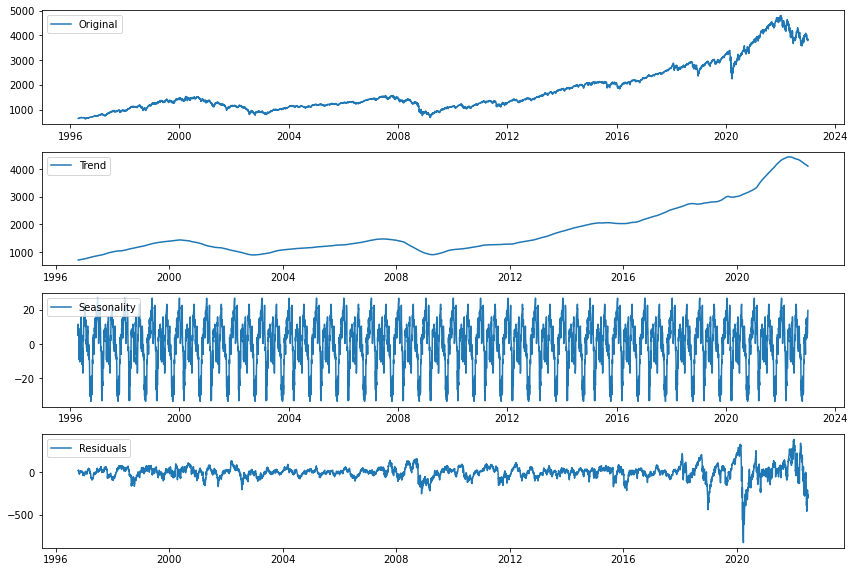

In [22]:
decompose_SP_Close = decompose_timeseries(df=df_SP, column_name='Close', period=252)

The seasonality components has the following shape:

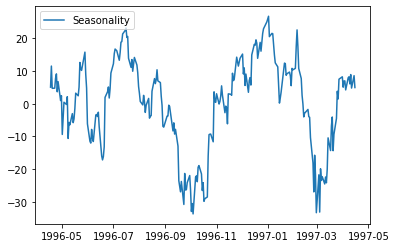

In [23]:
# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(decompose_SP_Close.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')

We observe a patter similar to that of the KO ticker.

Now we compute correlations:

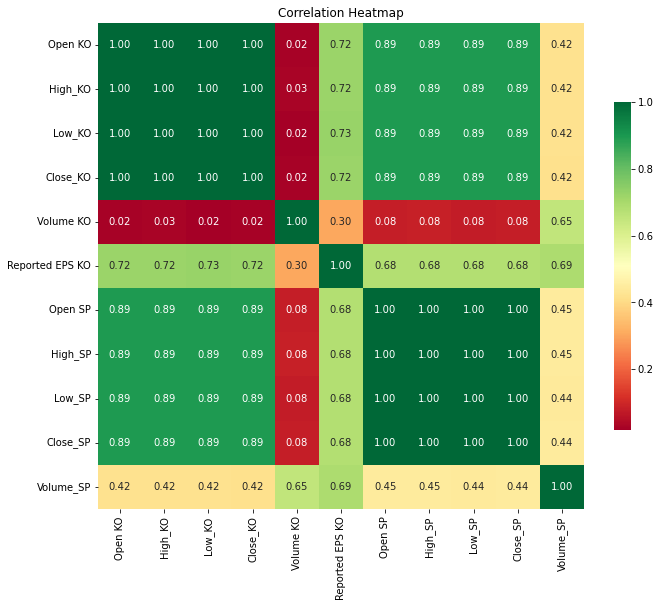

In [24]:
selected_data = pd.DataFrame({
    'Open KO': df_KO['Open'],
    'High_KO': df_KO['High'],
    'Low_KO': df_KO['Low'],
    'Close_KO': df_KO['Close'],
    'Volume KO': df_KO['Volume'],
    'Reported EPS KO': df_KO['Reported EPS'],
    'Open SP': df_SP['Open'],
    'High_SP': df_SP['High'],
    'Low_SP': df_SP['Low'],
    'Close_SP': df_SP['Close'],
    'Volume_SP': df_SP['Volume']
})

# calculate correlation matrix
corr = selected_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='RdYlGn', cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The upper left square is just the correlation heatmap we plotted previously. The off-diagonal squares includes the correlations with the S&P500 data.

Coca Cola Prices and S&P 500 Prices (0.89): this high positive correlation suggests that Coca Cola's stock price tends to move in the same direction as the overall market. This can happen when there are shared influences, like market factors (the overall market sentiment can impact all stocks), economic factors (certain macroeconomic factors, like changes in interest rates), company's market exposure (if the company has a broad market exposure, its stock price could be highly correlated with the S&P 500), and investment strategy (some funds and investors use index-based strategies, so stocks included in the index will often move in tandem with the index). Coca Cola, being a large and established company, would be expected to broadly follow these market trends.

Coca Cola Volume and S&P 500 Prices (0.08): this very low correlation suggests that there is no linear relationship between the trading volume of Coca Cola's stock and the price movements of the S&P 500. This could indicate that the daily trading volume of Coca Cola's shares is more influenced by company-specific news and events rather than the general market trends.

Coca Cola Prices and S&P 500 Volume (0.42): this moderate correlation might suggest that on days when overall market activity is high, there is a tendency for Coca Cola's stock price to increase. This could be due to various reasons, including increased buying activity in the market on high volume days which could push up prices of stocks including Coca Cola.

Coca Cola Volume and S&P 500 Volume (0.65): this relatively high positive correlation indicates that the trading volume of Coca Cola's stock tends to increase when the overall market volume (S&P 500 volume) increases, and vice versa. This suggests that investor activity in Coca Cola's stock is somewhat tied to overall market activity. This could potentially be due to a few factors. One is market-wide trends: on days when overall market activity is high (perhaps due to macroeconomic news or events affecting many or all stocks), both the S&P 500 volume and the volume of individual stocks might be expected to increase.  Another one is investor sentiment: for example, in times of high uncertainty, trading volumes across the market, including both the individual stock and the S&P 500, could rise as investors reassess their positions.

Coca Cola EPS and S&P 500 Prices (0.68):this suggests a fairly strong relationship between Coca Cola's earnings per share and the overall market price level, and might be due to the fact that Coca Cola's profitability can be influenced by the same macroeconomic factors that affect the overall market. This hypothesis is reinforced by the fact that the correlation between Coca Cola stock price and its EPS is quite similar (0.73).

Coca Cola EPS and S&P 500 Volume (0.69): a significant correlation here might imply that higher market activity (S&P 500 volume) is associated with higher Coca Cola's earnings per share. This could be because high trading volumes in the market often occur during periods of strong economic performance, which could also lead to higher corporate earnings.

### Lag analysis

Lag analysis is a method used to examine the relationship between data points at different times in a time series. It involves creating a series of lagged variables, where values at one period are compared with values at a previous period. The purpose is to identify patterns over time, such as autocorrelation or seasonality.

A lag plot for a time series will scatter plot the value at time t on the x-axis and the value at time t+lag on the y-axis. If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship. If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.  If points are scattered around or form a cloud without a noticeable pattern, it indicates that there is little to no autocorrelation, meaning past values do not help to predict future values. 

Let us plot the lag diagram for the KO stock:

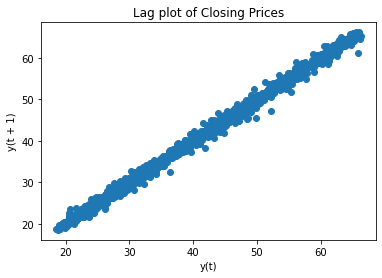

In [25]:
from pandas.plotting import lag_plot, autocorrelation_plot

# Create a lag plot
plt.figure() # create a new figure for the plot
lag_plot(df_KO['Close']) 
plt.title('Lag plot of Closing Prices') 
plt.show() 

We obtain a lag plot for the KO stock price tightly clustered along a diagonal line from the bottom-left to the top-right, in a rather homogeneous fashion throughout the plot. This suggests a strong positive correlation relationship between the stock price at time 't' and at time 't+1'. Essentially, this means that if the stock price is high (or low) at time 't', it's likely to be high (or low) at the next time point 't+1'. Generally speaking, this pattern can indicate a form of momentum or trend in the price movement: if the price is increasing, it continues to increase, and if it's decreasing, it continues to decrease. Note that this is indeed the overall pattern we found in our data visualization analysis of the KO stock price: we identified a succession of different phases with trends of growth and contraction in the plot for the `Close` KO price. The fact that the data points are clustered around the diagonal in a rather homogeneous way indicates homoscedasticity, meaning that the stock's volatility is can be considered approximately constant over time. This hypothesis is reinforced by the observation that, in the plot of KO stock price, the highs and lows within every trend phase tend be of similar magnitude.




The ACF (Autocorrelation Function) plot gives us insights into the time dependency of a given time series. The x-axis represents the number of lags we look back in the time series. The y-axis represents the correlation values. Each vertical line (stem) in the plot corresponds to the correlation between the time series and its lagged version.

The blue shaded region in the plot represents a confidence interval (often set at 95%). If the stem extends beyond this region, it means the correlation for the specific lag number is statistically significant.

Autocorrelation measures the relationship between a variable's current value and its past values. If the ACF plot shows slow decay, that usually means the series has a strong trend. If the plot shows a sharp drop after a certain number of lags, that could mean the series is seasonal. If the autocorrelation is close to 1 for the first few lags, then decreases to zero, that often means the series is a random walk or has a strong autoregressive component. If the autocorrelations are near zero for all lags, the series is likely purely random (white noise).

Let us plot the ACF function for the KO stock:

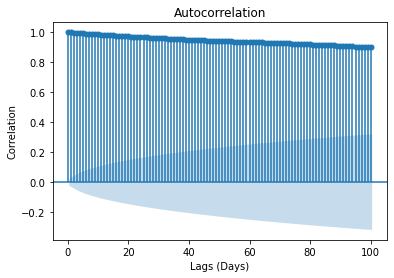

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_KO['Close'], lags=100)
plt.xlabel('Lags (Days)', fontsize=10)
plt.ylabel('Correlation', fontsize=10)
plt.show()

We notice that the autocorrelations for small lags are large and positive, then slowly decrease as the lags increase. This is interpreted as an indication of a trend and non-stationarity. Tis is indeed a common pattern for stock price time series.

## 2. Tesla stock

We now turn to the EDA of the TSLA stock prices. First we import the csv datafile as a dataframe:

In [28]:
# Read the csv file containing the data for the KO stock.
# index_col=0 tells pandas to use the first column as the index. 
# parse_dates=True tells pandas to interpret the index as a DateTimeIndex.
df_TSLA = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)

Let's check that our dataframe has the right format:

In [29]:
df_TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,Reported EPS
Date,,,,,,,
2010-08-05,1.436000,1.436667,1.336667,1.363333,1.363333,11943000,-0.0271
2010-08-06,1.340000,1.344000,1.301333,1.306000,1.306000,11128500,-0.0271
2010-08-09,1.326667,1.332000,1.296667,1.306667,1.306667,12190500,-0.0271
2010-08-10,1.310000,1.310000,1.254667,1.268667,1.268667,19219500,-0.0271
2010-08-11,1.246000,1.258667,1.190000,1.193333,1.193333,11964000,-0.0271


### Data visualization

Let us plot the `Close` price data of the TSLA stock:

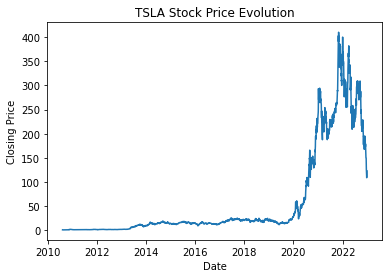

In [30]:
plt.plot(df_TSLA.index, df_TSLA['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TSLA Stock Price Evolution')
plt.show()

We observe a first phase of almost constant closing price that lasts from 2010 to 2020, followed by two phases of exponential growth between 2020 and 2022 that are separated by a slight decline in the stock price. In 2022, the stock price has declined throughut the year.

We will see later that the `Open`, `High` and `Low` prices have a highly correlated distribution with `Close` price, so we shall not plot them. 

The series of trading volume values displays more frequent spikes over time than in the case of the KO stock:

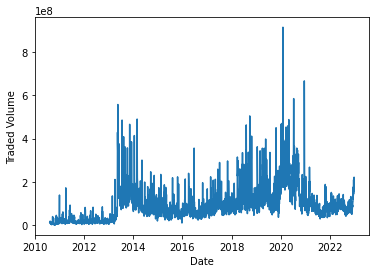

In [31]:
plt.plot(df_TSLA.index, df_TSLA['Volume'])
plt.xlabel('Date')
plt.ylabel('Traded Volume')
plt.show()

A volume plot that features multiple spikes indicates periods of significant trading activity for the stock. Such a spike in trading volume usually happens because of an event or situation that draws increased attention to the stock from investors, and may be related to the high volatility of TSLA.

Let's have a look now at the earnings per share:

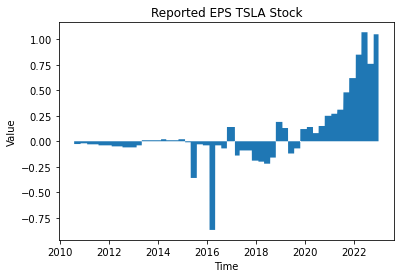

In [32]:
plt.fill_between(df_TSLA.index, df_TSLA['Reported EPS'])
plt.title('Reported EPS TSLA Stock')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

We observe that for the first ten years of the company's existence the reported EPS are negative most of the times, usually not going below -0.25, with a very sharp negative value around -0.8 in 2016. A negative EPS indicates that the company has reported a net loss for that period. This can happen if a company's expenses exceed its revenue. It's not an uncommon scenario for young companies, particularly in sectors like technology, where initial operating expenses can be high, and the company might not be profitable yet. In the case of TSLA, a profitable phase of exponential growth followed from 2020 to 2022, with oscillations ever since.

### Trend + seasonality + noise decomposition

Now we proceed to the decomposition of the TSLA stock price data series into trend, seasonality and noise components.

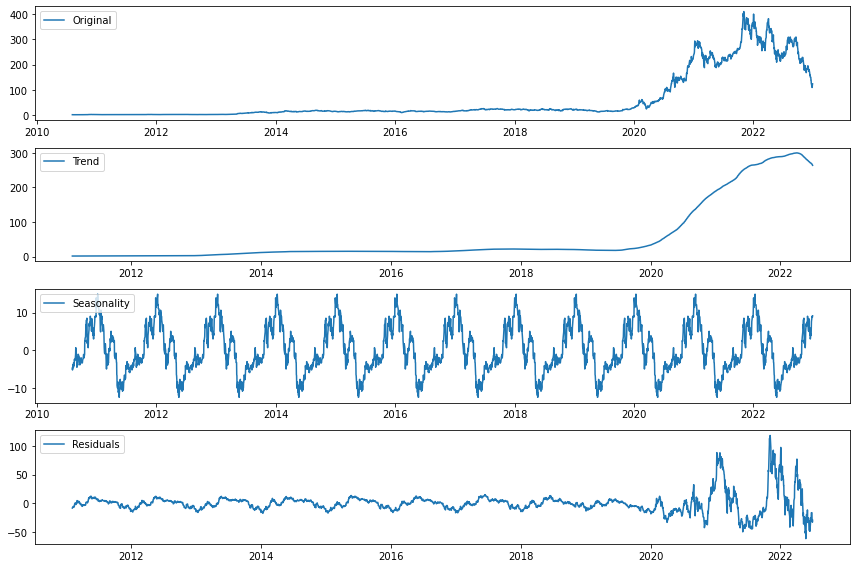

In [33]:
decompose_TSLA_Close = decompose_timeseries(df=df_TSLA, column_name='Close', period=252)

We observe that the trend component follows the general pattern we have described previosuly: a rather stable phase for the first ten years with a slight upward trend, followed by an explosive growth that eventually gets modulated to start a phase of contraction, with the stock price remaining on the high side.

In this case the seasonaility component is is stronger than for the KO stock, being only 1/10 of the order of magnitude of the highest values of the trend component. The noise signal appears to be rather periodic and of the same magnitude as the seasonality component for the first ten years, then becoming more irregular and more significant.

We can also have a closer look at one period of the seasonality signal:

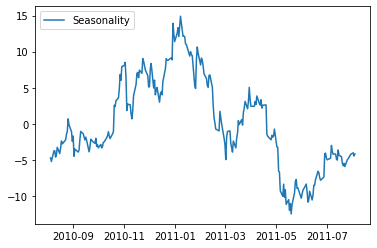

In [34]:
# Seasonality for one period
plt.subplot()
plt.plot(decompose_TSLA_Close.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')


This also has a wave-like form with peaks and valleys, but its pattern is different from the KO and SP500 stocks.

### Histogram and KDE estimation of probability distribution

In this section we plot the histogram of stock prices of TSLA ticker and perform a KDE estimation of the probability density:

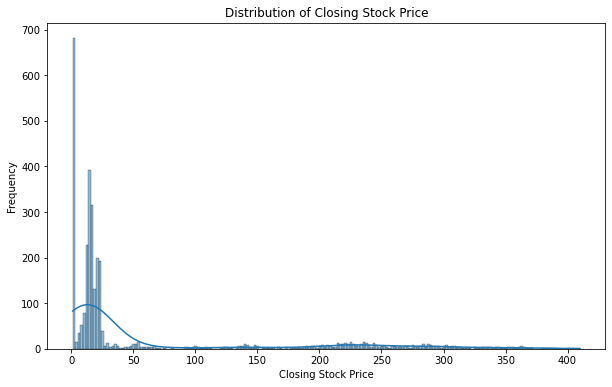

In [35]:
# Plot the histogram of the 'Close' stock price column. 
plt.figure(figsize=(10, 6))
sns.histplot(df_TSLA['Close'], kde=True) # 'kde=True' introduces the Kernel Density Estimation curve 
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

The histogram is extremely skewed to the left, as the value of the TSLA share remained under 30 dollars for more than half of the timeframe of its existence. The KDE has a single peak around 20 dollars.

### Outliers

Let us check now for outliers in the distribution of TSLA stock prices:

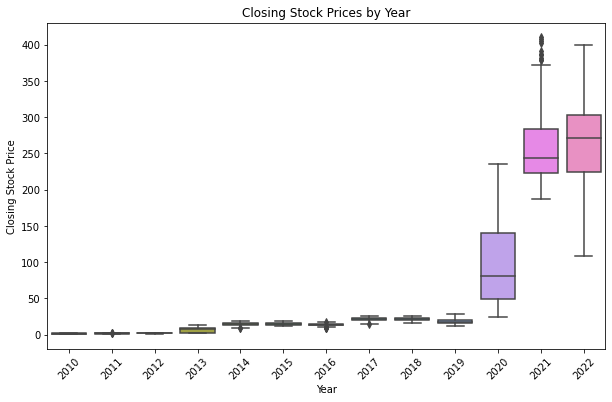

In [36]:
# Create a 'Year' column in the dataframe 'df_KO'
df_TSLA['Year'] = df_TSLA.index.year

# Create a boxplot of the closing prices by year
plt.figure(figsize=(10,6)) 
sns.boxplot(x='Year', y='Close', data=df_TSLA)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=45)
plt.show()

We observe a significant amount of outliers in 2021. This is easily explained as in this year the share price witnessed a sharp, volatile phase of exponential growth.

### Volatility

It is often stated in media that the TSLA stock is highly volatile. We will check this claim in this section by computing its annualized volatility.

First, we compute the log returns and plot the resulting series:

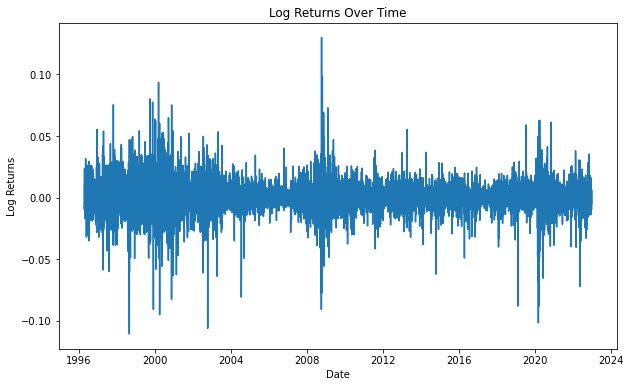

In [37]:
# Calculate log returns
df_TSLA['Log_Returns'] = np.log(df_TSLA['Close'] / df_TSLA['Close'].shift(1))

# Drop NA values
df_TSLA = df_TSLA.dropna()

# Plot log returns over time
plt.figure(figsize=(10, 6))
plt.plot(df_KO['Log_Returns'])
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()


Again, this looks like white noise. The ADF test yields the following values:

In [38]:
result = adfuller(df_KO['Log_Returns'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -42.928660
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


We can conclude with enough confidence that the series is stationary.

In order to compute the volatility, we have to compute the standard deviation:

In [39]:
# Calculate the standard deviation of log returns (volatility)
volatility = df_TSLA['Log_Returns'].std()

# Calculate the annualized volatility
annualized_volatility = volatility * np.sqrt(252) * 100

print("Volatility: ", annualized_volatility)

Volatility:  56.461429838933256


We obtain a volatility of around 56%, which is quite high (recall that the threshold for high volatility is 30%). Thus we corroborate the claim of the high volatility of TSLA stock.

### Correlations

We now wonder about how correlated are the different features of our dataset of the TSLA time series. Let's start by plotting the correlation heatmap:

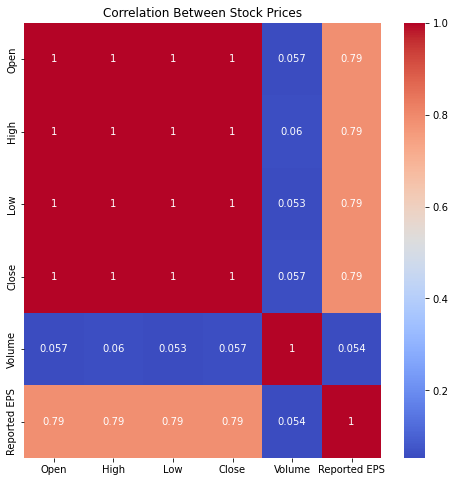

In [40]:
# Create a heatmap of the correlation between stock prices
corr = df_TSLA[['Open', 'High', 'Low', 'Close', 'Volume', 'Reported EPS']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

Again, we observe an almost perfect correlation between the different prices, as could be expected. We also notice an almost inexistent correlation between trading volume and prices, similarly to what happened with the KO stock, and we may provide the same interpretation: it is possible that other factors such as earnings reports, news events, and broader market conditions play a larger role in determining TSLA's stock price.

The reported EPS and prices are significantly positively correlated, which we explained previously that is to be expected. Furthermore, in this case, there is an almost vanishing correlation between trading volume and reported EPS, in contrast with the little correlation we found for the KO stock. This may indicate that the company's profitability does not seem to significantly impact the amount of shares being traded on a daily basis, with factors like market sentiment, news events impacting trading volume more. 

Since TSLA has not been an S&P500 company during the whole timeframe we are studying, we could expect somewhat less correlation with S&P500 data than in the case of KO stock. A correlation heatmap shows that this is indeed the case:

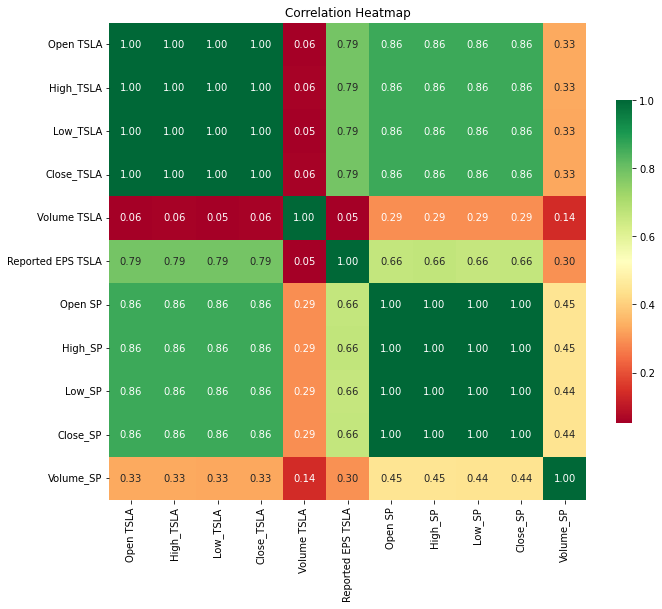

In [41]:
selected_data = pd.DataFrame({
    'Open TSLA': df_TSLA['Open'],
    'High_TSLA': df_TSLA['High'],
    'Low_TSLA': df_TSLA['Low'],
    'Close_TSLA': df_TSLA['Close'],
    'Volume TSLA': df_TSLA['Volume'],
    'Reported EPS TSLA': df_TSLA['Reported EPS'],
    'Open SP': df_SP['Open'],
    'High_SP': df_SP['High'],
    'Low_SP': df_SP['Low'],
    'Close_SP': df_SP['Close'],
    'Volume_SP': df_SP['Volume']
})

# calculate correlation matrix
corr = selected_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='RdYlGn', cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

TSLA Price and SP500 Price (0.86): this high correlation indicates that TSLA's stock price moves in the same direction as the S&P 500 index. This could imply that TSLA, like many other large companies, is influenced by the same macroeconomic factors that drive the overall market.

Volumes of TSLA and SP500 (0.14): we find a weak relationship between the trading volume of TSLA and the overall market. This could be due to the specific factors that affect TSLA's trading volume, such as news about the company or sentiment about the electric vehicle industry, which may not necessarily influence the entire market's volume.

SP500 Volume and TSLA Price (0.33): a moderate correlation suggesting that when there is more trading in the broader market, it tends to somewhat coincide with higher TSLA prices. However, the correlation is not very strong, so other factors are also significantly influencing TSLA's price.

TSLA Volume and SP500 Price (0.29): similar to the above, this moderate correlation indicates that when the broader market is doing well (higher S&P500 prices), there might be slightly more trading activity in TSLA.

TSLA Reported EPS and SP500 Volume (0.30): this weak correlation suggests that when TSLA's earnings are higher, there might be slightly more trading activity in the broader market. This could be due to investor sentiment or reactions to TSLA's earnings, considering its status as a major technology company.

TSLA Reported EPS and SP500 prices (0.66): this rather significant correlation indicates that TSLA's earnings performance is closely tied to broader market trends. When the overall market (S&P500) is doing well, TSLA tends to report higher earnings. This makes sense as broader market conditions can influence consumer spending.

### Lag analytsis

We shall now perform the lag analysis for the TSLA time series and plot the lag and autocorrelation plots.

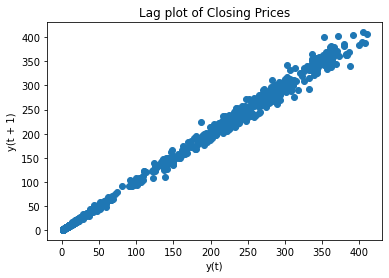

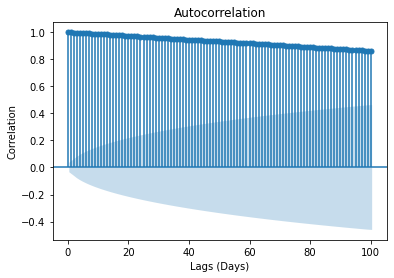

In [59]:
# Create a lag plot
plt.figure() # create a new figure for the plot
lag_plot(df_TSLA['Close']) # create a lag plot using the 'Close' column of the DataFrame
plt.title('Lag plot of Closing Prices') 
plt.show() 

plot_acf(df_TSLA['Close'], lags=100)
plt.xlabel('Lags (Days)', fontsize=10)
plt.ylabel('Correlation', fontsize=10)
plt.show()


In this case we obtain a lag plot where the data points cluster along the diagonal and gradually spread out, forming a funnel shape. This suggests that the stock price series may have a characteristic known as heteroscedasticity: essentially this means that the volatility of the stock price may be increasing over time. This was actually the conclusion from the data visualization step: after a period of 10 years of nearly constant value of the share price, a growing trend followed by a contracting phase happened, with a succession of several high peaks indicating large variations of the price in short periods of time. Traditional analysis of time series do not deal with situations with heteroscedasticity, so this is an instance where machine learning models can prove to be particularly helpful. 

Similarly to what we found for the KO stock, we find that the autocorrelations for small lags are large and positive, then slowly decrease as the lags increase, which signals a trend pattern and non-stationarity.